In [4]:
# # France Wheat Data Exploration
# 
# This notebook explores:
# 1. CY-Bench France wheat data (predictors + yields)
# 2. Euronext Milling Wheat futures (target for prediction)
# 3. How to align them for ML

In [5]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


# ## 1. Load CY-Bench France Data

In [6]:
CYBENCH_DIR = Path("../data/raw/cybench/cybench-data/wheat/FR/")
FUTURES_PATH = Path("../data/raw/futures/milling_wheat_raw.csv")


In [7]:
# 1.1 Yield Data (what CY-Bench was designed to predict)
yield_df = pd.read_csv(CYBENCH_DIR / "yield_wheat_FR.csv")
print("=== YIELD DATA ===")
print(f"Shape: {yield_df.shape}")
print(f"Columns: {yield_df.columns.tolist()}")
print(f"\nFirst rows:\n{yield_df.head()}")
print(f"\nYears: {sorted(yield_df['harvest_year'].unique())}")
print(f"Regions: {yield_df['adm_id'].nunique()} unique")
print(f"Yield range: {yield_df['yield'].min():.2f} - {yield_df['yield'].max():.2f} t/ha")

=== YIELD DATA ===
Shape: (2571, 7)
Columns: ['crop_name', 'country_code', 'adm_id', 'harvest_year', 'yield', 'harvest_area', 'production']

First rows:
      crop_name country_code adm_id  harvest_year  yield  harvest_area  \
0  winter_wheat           FR  FR102          1989  7.793      146550.0   
1  winter_wheat           FR  FR102          1990  8.193      151560.0   
2  winter_wheat           FR  FR102          1991  8.399      155374.0   
3  winter_wheat           FR  FR102          1992  7.399      155386.0   
4  winter_wheat           FR  FR102          1993  7.699      138638.0   

   production  
0   1142100.0  
1   1241692.0  
2   1305041.6  
3   1149776.4  
4   1067372.6  

Years: [np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(

In [8]:
# 1.2 Weather Data (daily)
meteo_df = pd.read_csv(CYBENCH_DIR / "meteo_wheat_FR.csv")
print("\n=== WEATHER DATA ===")
print(f"Shape: {meteo_df.shape}")
print(f"Columns: {meteo_df.columns.tolist()}")
print(f"\nFirst rows:\n{meteo_df.head()}")
print(f"\nDate range: {meteo_df['date'].min()} to {meteo_df['date'].max()}")


=== WEATHER DATA ===
Shape: (814800, 11)
Columns: ['crop_name', 'adm_id', 'date', 'tmin', 'tmax', 'prec', 'rad', 'tavg', 'et0', 'vpd', 'cwb']

First rows:
  crop_name adm_id      date   tmin    tmax   prec          rad   tavg    et0  \
0     wheat  FRK23  20010101 -1.681  10.098  1.439  2868324.750  5.916  0.633   
1     wheat  FRK24  20010101 -2.848   8.373  1.281  3581359.750  4.851  0.777   
2     wheat  FR102  20010101  2.480   8.243  9.146   720153.938  6.319  0.296   
3     wheat  FR103  20010101  1.708   7.559  8.553   979782.562  6.367  0.163   
4     wheat  FR104  20010101  2.578   7.948  8.850   711632.375  6.517  0.185   

     vpd    cwb  
0  5.771  0.806  
1  5.414  0.504  
2  2.463  8.850  
3  1.487  8.390  
4  1.820  8.665  

Date range: 20010101 to 20231231


In [9]:
# 1.3 Vegetation Data (fPAR - dekadal)
fpar_df = pd.read_csv(CYBENCH_DIR / "fpar_wheat_FR.csv")
print("\n=== fPAR DATA ===")
print(f"Shape: {fpar_df.shape}")
print(f"Columns: {fpar_df.columns.tolist()}")
print(f"\nFirst rows:\n{fpar_df.head()}")



=== fPAR DATA ===
Shape: (80316, 4)
Columns: ['crop_name', 'adm_id', 'date', 'fpar']

First rows:
  crop_name adm_id      date    fpar
0     wheat  FRK23  20010101  33.426
1     wheat  FRK24  20010101  40.637
2     wheat  FR102  20010101  38.104
3     wheat  FR103  20010101  37.619
4     wheat  FR104  20010101  38.240


In [10]:
# 1.4 Soil Data (static)
soil_df = pd.read_csv(CYBENCH_DIR / "soil_moisture_wheat_FR.csv")
print("\n=== SOIL DATA (Static) ===")
print(f"Shape: {soil_df.shape}")
print(f"Columns: {soil_df.columns.tolist()}")
print(f"\nFirst rows:\n{soil_df.head()}")


=== SOIL DATA (Static) ===
Shape: (740886, 5)
Columns: ['crop_name', 'adm_id', 'date', 'ssm', 'rsm']

First rows:
  crop_name adm_id      date    ssm      rsm
0     wheat  FRK23  20030201  6.748  332.128
1     wheat  FRK24  20030201  7.591  386.884
2     wheat  FR102  20030201  6.827  332.939
3     wheat  FR103  20030201  6.627  326.348
4     wheat  FR104  20030201  7.144  355.469


In [11]:
# 1.5 Crop Calendar (static - defines growing season)
calendar_df = pd.read_csv(CYBENCH_DIR / "crop_calendar_wheat_FR.csv")
print("\n=== CROP CALENDAR ===")
print(f"Shape: {calendar_df.shape}")
print(f"Columns: {calendar_df.columns.tolist()}")
print(f"\nFirst rows:\n{calendar_df.head()}")
print(f"\nSOS (Start of Season): day {calendar_df['sos'].min()} - {calendar_df['sos'].max()}")
print(f"EOS (End of Season): day {calendar_df['eos'].min()} - {calendar_df['eos'].max()}")


=== CROP CALENDAR ===
Shape: (97, 4)
Columns: ['crop_name', 'adm_id', 'sos', 'eos']

First rows:
  crop_name adm_id     sos      eos
0     wheat  FRK23  30.360  205.328
1     wheat  FRK24  33.667  206.391
2     wheat  FR102  29.698  211.050
3     wheat  FR103  31.054  210.658
4     wheat  FR104  29.003  210.013

SOS (Start of Season): day 2.818 - 355.105
EOS (End of Season): day 182.405 - 312.0


In [12]:
# ## 2. Load Futures Data
# ============================================================

# %%
# Load Investing.com data (manually downloaded)
# Format: Date, Price, Open, High, Low, Vol., Change %

futures_df = pd.read_csv(FUTURES_PATH)
print("=== MILLING WHEAT FUTURES ===")
print(f"Shape: {futures_df.shape}")
print(f"Columns: {futures_df.columns.tolist()}")
print(f"\nFirst rows:\n{futures_df.head()}")

=== MILLING WHEAT FUTURES ===
Shape: (5000, 7)
Columns: ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

First rows:
         Date   Price   Open    High     Low    Vol. Change %
0  07/11/2022  352.50  365.0  371.25  351.75  27.58K   -1.26%
1  07/08/2022  357.00  343.5  358.25  342.50  19.60K    5.39%
2  07/07/2022  338.75  334.5  340.00  330.75  26.80K    4.07%
3  07/06/2022  325.50  333.0  339.25  322.00  32.57K   -1.88%
4  07/05/2022  331.75  343.0  347.75  328.75  37.51K   -3.35%


In [13]:
# Clean futures data
def clean_futures(df):
    """Clean Investing.com downloaded data."""
    df = df.copy()
    
    # Standardize column names
    df.columns = [c.lower().strip().replace(' ', '_').replace('.', '').replace('%', 'pct') 
                  for c in df.columns]
    
    # Parse date: try flexible parsing first (handles "07/11/2022" and "Jan 02, 2020"), 
    # then fallback to known explicit formats if needed.
    df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, dayfirst=False, errors='coerce')
    if df['date'].isna().any():
        # Try common textual format like "Jan 02, 2020"
        mask = df['date'].isna()
        try:
            df.loc[mask, 'date'] = pd.to_datetime(df.loc[mask, 'date'], format='%b %d, %Y', errors='coerce')
        except Exception:
            pass
        # If still NaT, try day-first numeric (e.g., "11/07/2022" meaning 11 Nov)
        mask = df['date'].isna()
        if mask.any():
            try:
                df.loc[mask, 'date'] = pd.to_datetime(df.loc[mask, 'date'], format='%d/%m/%Y', errors='coerce')
            except Exception:
                pass
    
    # Clean numeric columns
    for col in ['price', 'open', 'high', 'low']:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace(',', '', regex=False).astype(float)
    
    # Rename price -> close
    df = df.rename(columns={'price': 'close'})
    
    # Sort by date
    df = df.sort_values('date').reset_index(drop=True)
    
    return df

futures_clean = clean_futures(futures_df)
print("\n=== CLEANED FUTURES ===")
print(f"Date range: {futures_clean['date'].min()} to {futures_clean['date'].max()}")
print(f"Price range: €{futures_clean['close'].min():.2f} - €{futures_clean['close'].max():.2f}")
print(f"\n{futures_clean.head()}")



=== CLEANED FUTURES ===
Date range: 2003-01-02 00:00:00 to 2022-07-11 00:00:00
Price range: €99.00 - €438.25

        date   close   open   high     low    vol change_pct
0 2003-01-02  112.00  112.0  112.0  112.00    NaN      0.00%
1 2003-01-03  112.00  112.0  112.0  112.00    NaN      0.00%
2 2003-01-06  111.75  112.0  112.0  111.75  0.09K     -0.22%
3 2003-01-07  111.25  111.5  111.5  111.25  0.10K     -0.45%
4 2003-01-08  111.00  111.0  111.0  111.00  0.01K     -0.22%


/var/folders/yp/2spnnnqx6ts06zjydbq78cm40000gn/T/ipykernel_4395/2396813212.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, dayfirst=False, errors='coerce')


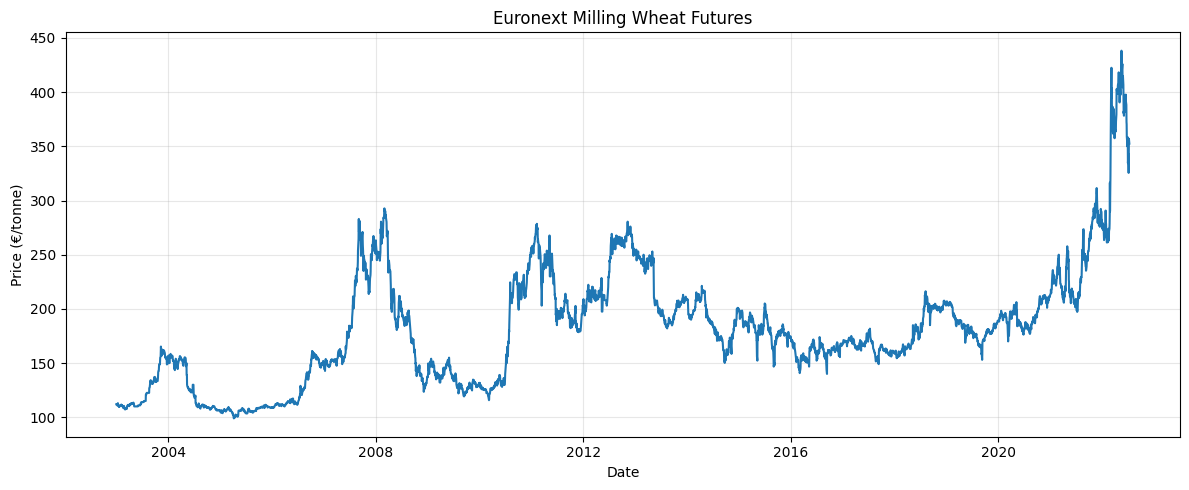

In [14]:
# Plot futures prices
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(futures_clean['date'], futures_clean['close'])
ax.set_xlabel('Date')
ax.set_ylabel('Price (€/tonne)')
ax.set_title('Euronext Milling Wheat Futures')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../reports/figures/milling_wheat_prices.png', dpi=150)
plt.show()

## 3. Understanding the Task
# 
# **Original CY-Bench task:** Predict end-of-season YIELD from predictors
# 
# **Your task:** Predict FUTURES PRICE at t+20 days from regional predictors
# 
# Key difference: 
# - CY-Bench: 1 yield per (region, year) → annual prediction
# - Your task: 1 price per day → need to align dekadal predictors to daily prices

In [15]:
# Visualize the temporal structure
print("=== TEMPORAL STRUCTURE ===")
print("\nCY-Bench predictors:")
print(f"  - Weather: daily")
print(f"  - fPAR: dekadal (3 per month)")
print(f"  - NDVI: ~8-day")
print(f"  - Yield: annual (end of season)")

print("\nFutures prices:")
print(f"  - Resolution: daily (trading days)")
print(f"  - Your target: price at t+20 trading days")

print("\n→ Strategy: Aggregate predictors to DEKADAL, predict futures at dekad end + 20 days")

=== TEMPORAL STRUCTURE ===

CY-Bench predictors:
  - Weather: daily
  - fPAR: dekadal (3 per month)
  - NDVI: ~8-day
  - Yield: annual (end of season)

Futures prices:
  - Resolution: daily (trading days)
  - Your target: price at t+20 trading days

→ Strategy: Aggregate predictors to DEKADAL, predict futures at dekad end + 20 days


In [16]:
# ============================================================
# INTERPOLATION FUNCTIONS
# ============================================================

def interpolate_to_daily(df, date_col='date', value_col='fpar', group_col='adm_id'):
    """
    Interpolate sparse time series (dekadal/8-day) to daily resolution.
    
    Uses linear interpolation between observations for each region.
    
    Parameters
    ----------
    df : pd.DataFrame
        Sparse data with date, value, and group columns
    date_col : str
        Name of date column
    value_col : str
        Name of value column to interpolate
    group_col : str
        Name of region/group column
    
    Returns
    -------
    pd.DataFrame
        Daily interpolated data
    """
    print(f"\n  Interpolating {value_col} to daily...")
    
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    
    # Get date range
    min_date = df[date_col].min()
    max_date = df[date_col].max()
    all_dates = pd.date_range(min_date, max_date, freq='D')
    
    print(f"    Original observations: {len(df)}")
    print(f"    Date range: {min_date.date()} to {max_date.date()}")
    print(f"    Target daily dates: {len(all_dates)}")
    
    # Interpolate for each region
    regions = df[group_col].unique()
    interpolated = []
    
    for region in regions:
        region_data = df[df[group_col] == region].copy()
        region_data = region_data.set_index(date_col)
        
        # Create daily index for this region
        daily_index = pd.date_range(
            region_data.index.min(), 
            region_data.index.max(), 
            freq='D'
        )
        
        # Reindex and interpolate
        region_daily = region_data[[value_col]].reindex(daily_index)
        region_daily[value_col] = region_daily[value_col].interpolate(
            method='linear',
            limit_direction='both'
        )
        
        # Add region identifier
        region_daily[group_col] = region
        region_daily = region_daily.reset_index()
        region_daily = region_daily.rename(columns={'index': date_col})
        
        interpolated.append(region_daily)
    
    result = pd.concat(interpolated, ignore_index=True)
    print(f"    Interpolated observations: {len(result)}")
    
    return result


def interpolate_fpar(fpar_df):
    """Interpolate dekadal fPAR to daily."""
    return interpolate_to_daily(
        fpar_df, 
        date_col='date', 
        value_col='fpar', 
        group_col='adm_id'
    )


def interpolate_ndvi(ndvi_df):
    """Interpolate ~8-day NDVI to daily."""
    return interpolate_to_daily(
        ndvi_df, 
        date_col='date', 
        value_col='ndvi', 
        group_col='adm_id'
    )


# ============================================================
# CREATE TARGETS
# ============================================================

def create_daily_targets(futures_df, horizon=20):
    """
    Create target prices: for each trading day, get price at t+horizon.
    
    Parameters
    ----------
    futures_df : pd.DataFrame
        Daily futures prices with 'date' and 'close' columns
    horizon : int
        Number of trading days ahead for target
    
    Returns
    -------
    pd.DataFrame
        Dates with corresponding target prices
    """
    print(f"\nCreating t+{horizon} targets...")
    
    df = futures_df[['date', 'close']].copy()
    df = df.sort_values('date').reset_index(drop=True)
    
    # Shift to get future price
    df[f'target_price_t{horizon}'] = df['close'].shift(-horizon)
    df = df.rename(columns={'close': 'price_current'})
    
    # Calculate future return (for reference)
    df[f'target_return_t{horizon}'] = (
        (df[f'target_price_t{horizon}'] / df['price_current']) - 1
    ) * 100
    
    valid_targets = df[f'target_price_t{horizon}'].notna().sum()
    print(f"  Trading days: {len(df)}")
    print(f"  Valid targets (with t+{horizon} price): {valid_targets}")
    
    return df



In [17]:
# MERGE ALL DATA
# ============================================================

def merge_daily_features(meteo_df, soil_moisture_df, fpar_daily, ndvi_daily, 
                         soil_df, crop_mask_df, location_df):
    """
    Merge all daily features into single dataframe.
    
    All time-varying features should be at daily resolution.
    """
    print("\nMerging daily features...")
    
    # Start with meteo as base (should be complete)
    result = meteo_df.copy()
    print(f"  Base (meteo): {result.shape}")
    
    merge_keys = ['adm_id', 'date']
    
    # Add soil moisture
    if soil_moisture_df is not None:
        sm_cols = merge_keys + [c for c in soil_moisture_df.columns 
                                 if c not in merge_keys]
        result = result.merge(soil_moisture_df[sm_cols], on=merge_keys, how='left')
        print(f"  + soil_moisture: {result.shape}")
    
    # Add interpolated fPAR
    if fpar_daily is not None:
        fpar_cols = merge_keys + ['fpar']
        result = result.merge(fpar_daily[fpar_cols], on=merge_keys, how='left')
        print(f"  + fpar (interpolated): {result.shape}")
    
    # Add interpolated NDVI
    if ndvi_daily is not None:
        ndvi_cols = merge_keys + ['ndvi']
        result = result.merge(ndvi_daily[ndvi_cols], on=merge_keys, how='left')
        print(f"  + ndvi (interpolated): {result.shape}")
    
    # Add static soil features
    if soil_df is not None:
        soil_cols = ['adm_id'] + [c for c in soil_df.columns if c != 'adm_id']
        result = result.merge(soil_df[soil_cols], on='adm_id', how='left')
        print(f"  + soil (static): {result.shape}")
    
    # Add crop mask (area weighting)
    if crop_mask_df is not None:
        mask_cols = ['adm_id'] + [c for c in crop_mask_df.columns 
                                   if c != 'adm_id' and 'crop_area' in c.lower()]
        if len(mask_cols) > 1:
            result = result.merge(crop_mask_df[mask_cols], on='adm_id', how='left')
            print(f"  + crop_mask: {result.shape}")
    
    # Add location
    if location_df is not None:
        loc_cols = ['adm_id', 'latitude', 'longitude']
        loc_cols = [c for c in loc_cols if c in location_df.columns]
        if len(loc_cols) > 1:
            result = result.merge(location_df[loc_cols], on='adm_id', how='left')
            print(f"  + location: {result.shape}")
    
    return result


## 5. Summary & Next Steps

In [ ]:
def add_targets_to_features(features_df, targets_df, horizon=20):
    """
    Add futures price targets to feature dataframe.
    
    For each (region, date), add the futures price at t+horizon.
    
    Note: Multiple regions on the same date get the SAME target 
    (this is the panel structure).
    """
    print(f"\nAdding t+{horizon} targets to features...")
    
    target_cols = ['date', f'target_price_t{horizon}', 'price_current']
    result = features_df.merge(targets_df[target_cols], on='date', how='inner')
    
    print(f"  Before merge: {len(features_df)} rows")
    print(f"  After merge: {len(result)} rows")
    print(f"  (Inner join keeps only dates with futures data)")
    
    # Drop rows without valid target
    valid_before = len(result)
    result = result.dropna(subset=[f'target_price_t{horizon}'])
    print(f"  After dropping NaN targets: {len(result)} rows")
    
    return result


: 

In [ ]:
# ============================================================
# MAIN PIPELINE
# ============================================================

HORIZON = 20
OUTPUT_DIR = CYBENCH_DIR.parent.parent / 'processed'
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

def convert_date_format(df, date_col='date'):
    """Convert date column from int (YYYYMMDD) to datetime64."""
    df = df.copy()
    if df[date_col].dtype == 'int64':
        df[date_col] = pd.to_datetime(df[date_col].astype(str), format='%Y%m%d')
    return df


def load_cybench_france():
    """Load all CyBench data for France."""
    return {
        'meteo': convert_date_format(meteo_df),
        'soil': convert_date_format(soil_df),
        'fpar': convert_date_format(fpar_df),
        'location': None,  # Add if available
        'crop_mask': None,  # Add if available
        'soil_moisture': None  # Add if available
    }


def load_futures():
    """Load futures data."""
    return futures_clean


def build_daily_feature_matrix(cybench_data, futures_df, horizon=20):
    """
    Build the complete daily (region, date) → price feature matrix.
    """
    
    print("\n" + "="*60)
    print("BUILDING DAILY FEATURE MATRIX")
    print("="*60)
    
    # 1. Interpolate vegetation indices to daily
    print("\n1. Interpolating vegetation indices to daily...")
    
    fpar_daily = None
    ndvi_daily = None
    
    if 'fpar' in cybench_data:
        fpar_daily = interpolate_fpar(cybench_data['fpar'])
    
    if 'ndvi' in cybench_data:
        ndvi_daily = interpolate_ndvi(cybench_data['ndvi'])
    
    # 2. Create futures targets
    print("\n2. Creating futures targets...")
    targets = create_daily_targets(futures_df, horizon)
    
    # 3. Merge all features
    print("\n3. Merging all features...")
    features = merge_daily_features(
        meteo_df=cybench_data.get('meteo'),
        soil_moisture_df=cybench_data.get('soil_moisture'),
        fpar_daily=fpar_daily,
        ndvi_daily=ndvi_daily,
        soil_df=cybench_data.get('soil'),
        crop_mask_df=cybench_data.get('crop_mask'),
        location_df=cybench_data.get('location')
    )
    
    # 4. Add targets
    print("\n4. Adding targets...")
    dataset = add_targets_to_features(features, targets, horizon)
    
    # 5. Add time features
    print("\n5. Adding time features...")
    dataset['year'] = dataset['date'].dt.year
    dataset['month'] = dataset['date'].dt.month
    dataset['day_of_year'] = dataset['date'].dt.dayofyear
    dataset['week_of_year'] = dataset['date'].dt.isocalendar().week.astype(int)
    
    # 6. Summary
    print("\n" + "="*60)
    print("FINAL DATASET SUMMARY")
    print("="*60)
    print(f"Shape: {dataset.shape}")
    print(f"Regions: {dataset['adm_id'].nunique()}")
    print(f"Unique dates: {dataset['date'].nunique()}")
    print(f"Date range: {dataset['date'].min()} to {dataset['date'].max()}")
    print(f"Years: {sorted(dataset['year'].unique())}")
    
    # Feature columns
    non_feature_cols = ['adm_id', 'date', 'year', 'month', 'day_of_year', 
                        'week_of_year', f'target_price_t{horizon}', 'price_current']
    feature_cols = [c for c in dataset.columns if c not in non_feature_cols]
    print(f"\nFeature columns ({len(feature_cols)}):")
    print(f"  {feature_cols}")
    
    # Check for missing values
    print(f"\nMissing values:")
    missing = dataset[feature_cols].isnull().sum()
    missing = missing[missing > 0]
    if len(missing) > 0:
        print(missing)
    else:
        print("  None!")
    
    return dataset


def main():
    """Main pipeline."""
    
    # Load data
    cybench_data = load_cybench_france()
    futures_df = load_futures()
    
    # Build features
    dataset = build_daily_feature_matrix(cybench_data, futures_df, horizon=HORIZON)
    
    # Save full dataset
    output_path = OUTPUT_DIR / f"france_wheat_daily_t{HORIZON}.csv"
    dataset.to_csv(output_path, index=False)
    print(f"\nSaved full dataset to: {output_path}")
    print(f"  Size: {output_path.stat().st_size / 1e6:.1f} MB")
    
    # Save a sample for quick testing
    sample_size = min(10000, len(dataset))
    sample = dataset.sample(sample_size, random_state=42)
    sample_path = OUTPUT_DIR / f"france_wheat_daily_t{HORIZON}_sample.csv"
    sample.to_csv(sample_path, index=False)
    print(f"\nSaved sample ({sample_size} rows) to: {sample_path}")
    
    return dataset


if __name__ == "__main__":
    dataset = main()


BUILDING DAILY FEATURE MATRIX

1. Interpolating vegetation indices to daily...

  Interpolating fpar to daily...
    Original observations: 80316
    Date range: 2001-01-01 to 2023-12-21
    Target daily dates: 8390
    Interpolated observations: 813830

2. Creating futures targets...

Creating t+20 targets...
  Trading days: 5000
  Valid targets (with t+20 price): 4980

3. Merging all features...

Merging daily features...
  Base (meteo): (814800, 11)
  + fpar (interpolated): (814800, 12)
